In [1]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv


In [10]:
import pandas as pd 
df=pd.read_csv('imdb_top_1000.csv', encoding='utf8')
df['Gross']=df['Gross'].str.replace(',','') #remove column
df = df.dropna(subset=["Gross"]) #dropnNaN because was affecting conversion to int
df = df.dropna(subset=["Certificate"]) #dropnNaN because was affecting conversion to int
df['Gross'] = df['Gross'].astype(int) #convert to int
df.sort_values(["Released_Year"], 
                    axis=0,
                    ascending=[True], 
                    inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5450000
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,977375
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5450000
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67 min,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1033895
319,https://m.media-amazon.com/images/M/MV5BNDVkYm...,Sunrise: A Song of Two Humans,1927,Passed,94 min,"Drama, Romance",8.1,An allegorical tale about a man fighting the g...,NaN,F.W. Murnau,George O'Brien,Janet Gaynor,Margaret Livingston,Bodil Rosing,46865,539540


In [11]:
def to_million(x):
  return x/1000000
df.Gross = df.Gross.apply(to_million)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5.450000
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,0.977375
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5.450000
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67 min,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1.033895
319,https://m.media-amazon.com/images/M/MV5BNDVkYm...,Sunrise: A Song of Two Humans,1927,Passed,94 min,"Drama, Romance",8.1,An allegorical tale about a man fighting the g...,NaN,F.W. Murnau,George O'Brien,Janet Gaynor,Margaret Livingston,Bodil Rosing,46865,0.539540


In [12]:
#attempting to group dataset by year and calculate average gross per genre

df['AVG_Gross'] = df.groupby('Certificate').Gross.transform('mean')
df.head(8)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,AVG_Gross
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921,Passed,68 min,"Comedy, Drama, Family",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,5.450000,5.435554
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,0.977375,5.435554
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925,Passed,95 min,"Adventure, Comedy, Drama",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,5.450000,5.435554
320,https://m.media-amazon.com/images/M/MV5BYmRiMD...,The General,1926,Passed,67 min,"Action, Adventure, Comedy",8.1,When Union spies steal an engineer's beloved l...,NaN,Clyde Bruckman,Buster Keaton,Buster Keaton,Marion Mack,Glen Cavender,81156,1.033895,5.435554
319,https://m.media-amazon.com/images/M/MV5BNDVkYm...,Sunrise: A Song of Two Humans,1927,Passed,94 min,"Drama, Romance",8.1,An allegorical tale about a man fighting the g...,NaN,F.W. Murnau,George O'Brien,Janet Gaynor,Margaret Livingston,Bodil Rosing,46865,0.539540,5.435554
317,https://m.media-amazon.com/images/M/MV5BNjBjND...,La passion de Jeanne d'Arc,1928,Passed,110 min,"Biography, Drama, History",8.1,"In 1431, Jeanne d'Arc is placed on trial on ch...",NaN,Carl Theodor Dreyer,Maria Falconetti,Eugene Silvain,André Berley,Maurice Schutz,47676,0.021877,5.435554
461,https://m.media-amazon.com/images/M/MV5BMzg2MW...,All Quiet on the Western Front,1930,U,152 min,"Drama, War",8.0,"A German youth eagerly enters World War I, but...",91.0,Lewis Milestone,Lew Ayres,Louis Wolheim,John Wray,Arnold Lucy,57318,3.270000,87.246581
52,https://m.media-amazon.com/images/M/MV5BY2I4Mm...,City Lights,1931,G,87 min,"Comedy, Drama, Romance",8.5,"With the aid of a wealthy erratic tippler, a d...",99.0,Charles Chaplin,Charles Chaplin,Virginia Cherrill,Florence Lee,Harry Myers,167839,0.019181,49.596326


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

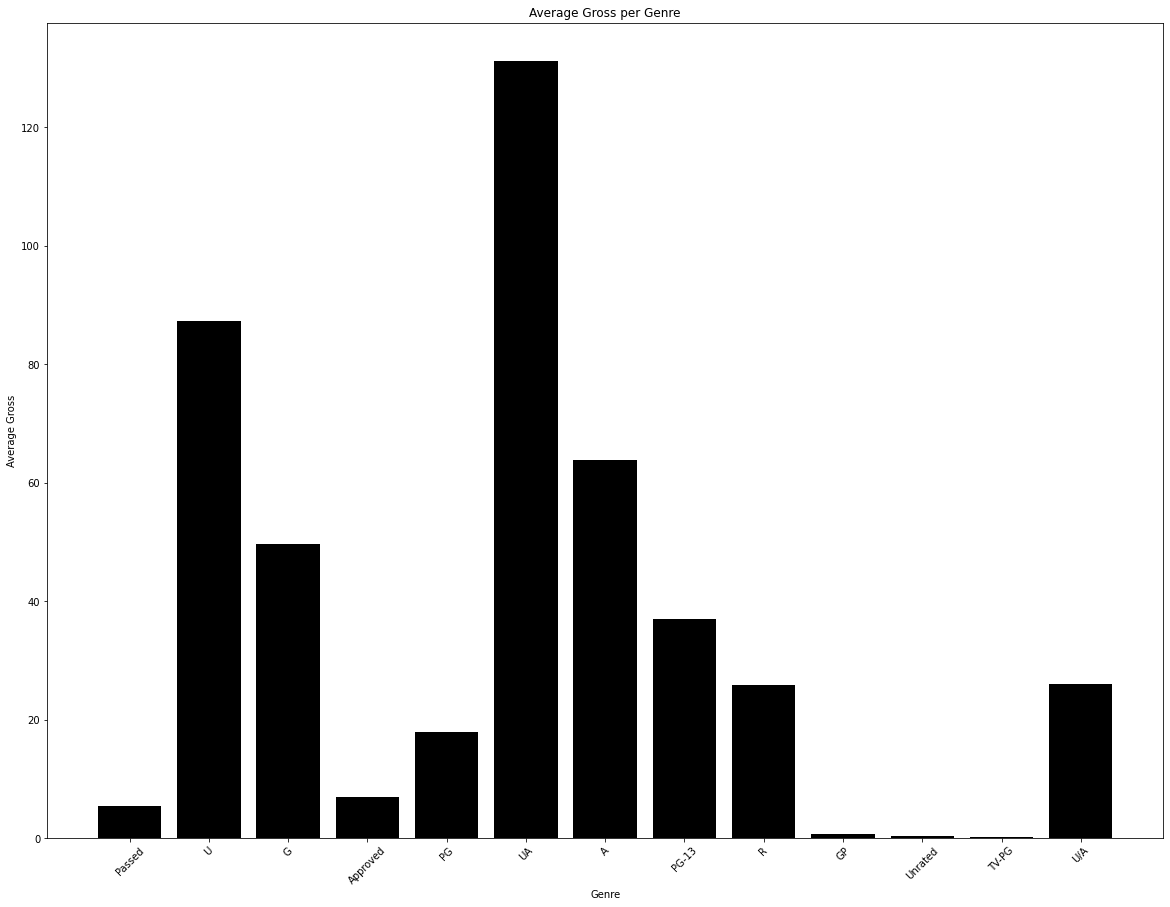

In [19]:
fig, ax = plt.subplots(figsize=(20,15))
ax.bar(df["Certificate"], df["AVG_Gross"], color="black")
plt.title("Average Gross per Genre") 
plt.xlabel("Genre")
plt.ylabel("Average Gross")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show() 